# Case study on Supervised learning

Do the following in the iris dataset.

1. Read the dataset to the python environment.

2. Do necessary pre-processing steps.

3. Find out which classification model gives the best result to predict iris

species.(also do random forest algorithm)

In [1]:
#Importing the modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the  dataset to the python environment.

In [2]:
#Loading the dataset
df = pd.DataFrame(pd.read_excel("F:\\pythonprogramming\\iris3.xls"))
df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
#how many rows and columns
df.shape

(150, 5)

The dataset contains 150 rows and 5 columns

In [4]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# 2.  Preprocessing the dataset

In [5]:
df.info()#prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# To verify if any null values present
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

The columns SL, SW, PL have missing values 

In [8]:
#Fill in the missing values of the columns SL,SW and PL 
df["SL"] =df["SL"].fillna(df["SL"].mean())
df["SW"] =df["SW"].fillna(df["SW"].mean())
df["PL"] =df["PL"].fillna(df["PL"].mean())
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Check and handle the outliers

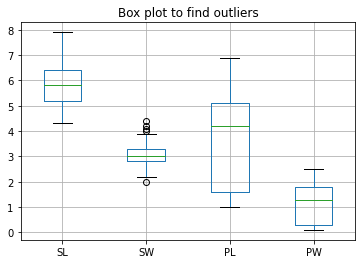

In [11]:
plt.title('Box plot to find outliers')
df.boxplot(column=['SL','SW','PL','PW'], figsize=(20,10), grid=True)

plt.show()

In [17]:
#To handle the outliers in column SW
Q1 = np.percentile(df['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(df['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(df['SW'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
df['SW'].median()

2.8
3.0
3.25


3.0

In [16]:
#Finding IQR
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print('The lower limit is : ', low_lim)
print('The upper limit is : ', upp_lim)

The lower limit is :  2.1249999999999996
The upper limit is :  3.9250000000000003


In [19]:
# To remove all the values below 2.1 and above 3.9
outlier = []
for x in df['SW']:
    if ((x >  upp_lim) or (x < low_lim)):
        outlier.append(x)

In [20]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [21]:
# To find the index of the upper limit outliers 
index1 = df['SW'] > upp_lim
df.loc[index1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [23]:
# To drop these outliers 
df.drop([14, 15, 32, 33], inplace=True)

In [25]:
# To find the index of the lower limit outliers 
index1 = df['SW'] < low_lim
df.loc[index1].index

Int64Index([60], dtype='int64')

In [27]:
# To drop these outliers 
df.drop([60], inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

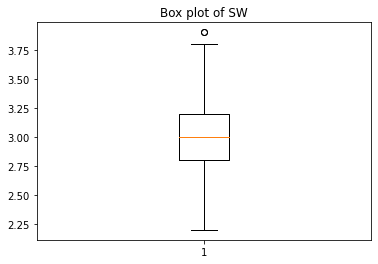

In [28]:
#To check if outliers are handled
plt.boxplot(df['SW'])
plt.title('Box plot of SW')

Handled the outliers of the column SW 

In [30]:
#Converting categorical variable 'Classification' into numerical 
# Label Encoding
from sklearn import preprocessing
label = preprocessing.LabelEncoder() 
df['Classification']= label.fit_transform(df['Classification']) 
print(df['Classification'].unique())

[0 1 2]


In [32]:
df.head(10)

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0
5,5.400000,3.9,1.7,0.4,0
6,4.600000,3.4,1.4,0.3,0
7,5.000000,3.4,1.5,0.2,0
8,4.400000,2.9,1.4,0.2,0
9,4.900000,3.1,1.5,0.1,0


In [33]:
#check the counts of classification column
df['Classification'].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

In [34]:
#to check the % of these Classification
df['Classification'].value_counts(normalize = True)

2    0.344828
1    0.337931
0    0.317241
Name: Classification, dtype: float64

In [35]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [36]:
#splitting the dataset
x= df.drop(['Classification'], axis=1)
y= df['Classification']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [37]:
# check how many datapoints in the training set
x_train.shape

(116, 4)

# 3. Find out which classification model gives the best result to predict iris species

# a) LOGISTIC REGRESSION

In [38]:
# import and create the model
from sklearn.linear_model import LogisticRegression
#creating the instance of the model
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
# we have to predict the values in the x_test using this model created and storing those values to a variable y_pred
y_pred = logit_model.predict(x_test)

C:\Users\Revathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy is:',accuracy_score(y_test,y_pred)*100)

Accuracy is: 89.65517241379311


# b) KNN 

In [45]:
#import and create the model
from sklearn.neighbors import KNeighborsClassifier
#  find the optimum k-value 
acc_values =  []
neighbors =  np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    #create the model
    classifier.fit(x_train, y_train)
    #predict our output using this model
    y_pred = classifier.predict(x_test)
    #now our knn model is created
    #then append the accuracy list to empty list inorder to find the max. accuracy
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [46]:
# check which are different accuracy values that we have got for differerent k values
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Text(0, 0.5, 'accuracy ')

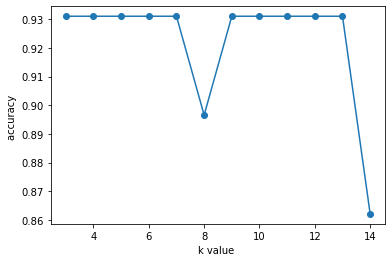

In [47]:
#plotting a graph bw the neighbor values(k values and accuracy values)
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value ')
plt.ylabel('accuracy ')

In [48]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=4)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [49]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207]

Text(0, 0.5, 'accuracy ')

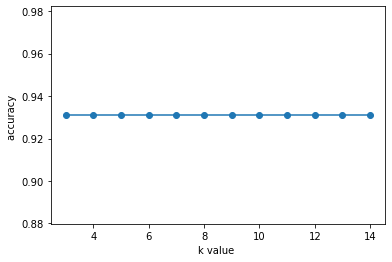

In [50]:
# Again plotting the graph
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value ')
plt.ylabel('accuracy ')

In [52]:
print('Accuracy is:',accuracy_score(y_test,y_pred)*100)

Accuracy is: 93.10344827586206


# c) Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
#Create an instance and store it in a varible
dt_model = DecisionTreeClassifier()
#dependent varibles y_train and idependent variables are features
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dt_model.predict(x_test)
print("Accuracy on decision tree model :",accuracy_score(y_test,y_pred)*100)

Accuracy on decision tree model : 89.65517241379311


# d) Random forest 

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = rf.predict(x_test)
print("Accuracy  :",accuracy_score(y_test,y_pred)*100)

Accuracy  : 89.65517241379311


Random Forest , Decision Tree and logistic regression are giving same accuracy of 89.65.

KNN accuracy score is 93.10 which is better than other classification models

CONCLUSION: KNN gives the best result to predict iris species.